<a href="https://colab.research.google.com/github/willismax/MediaSystem-Python-Course/blob/main/01.Intro-Python/Python%E8%B3%87%E6%96%99%E5%88%86%E6%9E%90%E6%87%89%E7%94%A8_%E8%82%A1%E7%A5%A8%E5%88%86%E6%9E%90%E5%85%A5%E9%96%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

本單元將嘗試抓取股票資訊來分析股票，取出歷史收盤資料畫出圖表、取得收益率(投資風險會使用到)、每天的波動。

## 用 Python pandas_datareader 抓台灣股價

- [pandas-datareader文件](https://pandas-datareader.readthedocs.io/en/latest/index.html)

回傳的格式規格

- Open     :開盤價
- High     :最高價
- Low      :最低價
- Close    :收盤價
- Volume   :交易量
- Adj Close:經過調整的收盤價

### 06-1-1.基本使用

In [4]:
!pip install yfinance

In [ ]:
!pip install mplfinance

In [5]:
# 以yfinace讀取股價
import yfinance as yf
start = "2024-1-1"
end = '2024-4-13'
df = yf.download('0050.tw',start,end)

[*********************100%%**********************]  1 of 1 completed


In [ ]:
df

In [8]:
import mplfinance as mpf

#繪製K線圖
mpf.plot(df, type='candle', mav=(5,20), volume=True, title='0050.TW', savefig='test_plot.png')

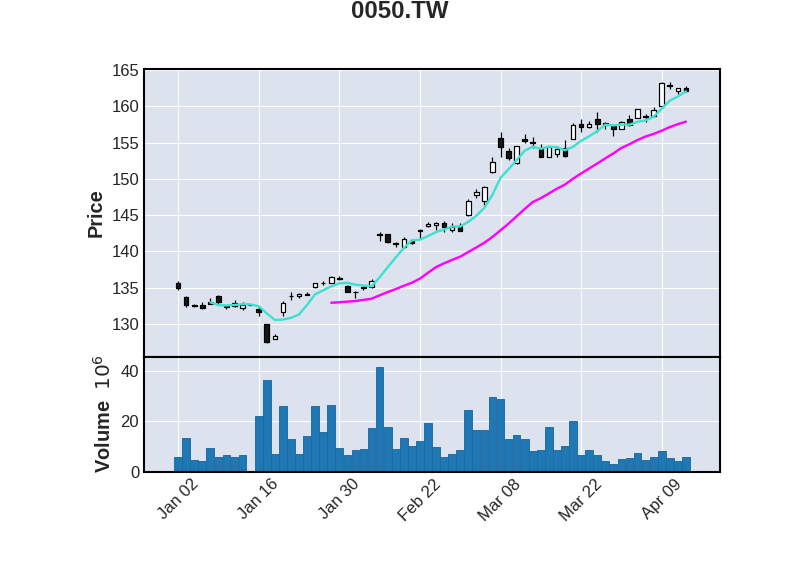

In [11]:
from IPython.display import Image

#顯示本機圖片
Image("test_plot.png")

In [12]:
import yfinance as yf

start = "2024-1-1"
end = '2024-4-13'

# 台灣股市的話要用 股票代號 加上 .TW
df_2317 = yf.download('2317.tw',start,end)
df_2330 = yf.download('2330.tw',start,end)
df_0050 = yf.download('0050.tw',start,end)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [13]:
df_2317
# df_2330
# df_0050

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-01-02,104.5,105.0,104.0,105.0,105.0,19921105
2024-01-03,104.5,105.0,104.0,104.5,104.5,18957682
2024-01-04,104.5,105.0,104.0,104.0,104.0,15488559
2024-01-05,104.0,104.5,104.0,104.0,104.0,13349572
2024-01-08,103.5,104.0,101.5,101.5,101.5,34642006
...,...,...,...,...,...,...
2024-04-08,159.0,160.0,156.5,158.0,158.0,108228836
2024-04-09,158.5,161.5,155.5,158.0,158.0,101725664
2024-04-10,159.0,160.0,154.0,154.5,154.5,97698334


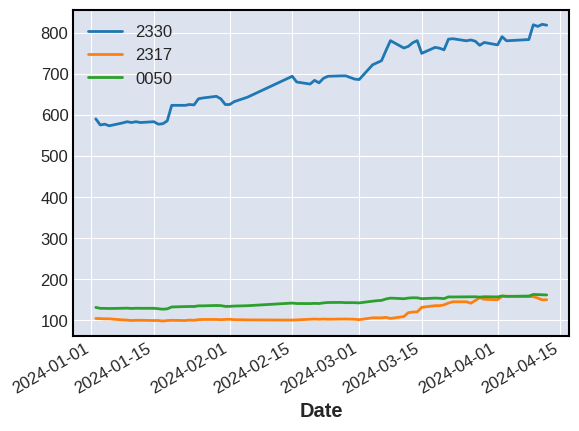

In [16]:
from matplotlib import pyplot as plt

fig = plt.figure()
df_2330['Adj Close'].plot(label="2330")
df_2317['Adj Close'].plot(label="2317")
df_0050['Adj Close'].plot(label="0050")
plt.legend()

[*********************100%%**********************]  3 of 3 completed


<Axes: xlabel='Date'>

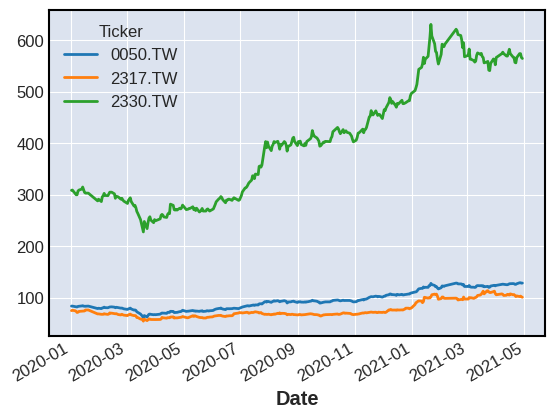

In [18]:
import datetime

# 以datetime模組示範
start = datetime.datetime(2020, 1, 1)
end = datetime.datetime(2021, 5, 3)

# 以list一次查詢多筆
df = yf.download(['2330.TW', '0050.TW', '2317.TW'], start=start, end=end)
df['Adj Close'].plot()

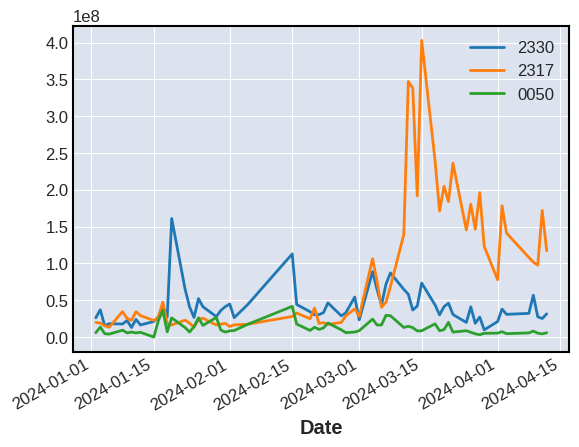

In [25]:
#交易量
fig = plt.figure()
df_2330['Volume'].plot(label="2330")
df_2317['Volume'].plot(label="2317")
df_0050['Volume'].plot(label="0050")

plt.legend()

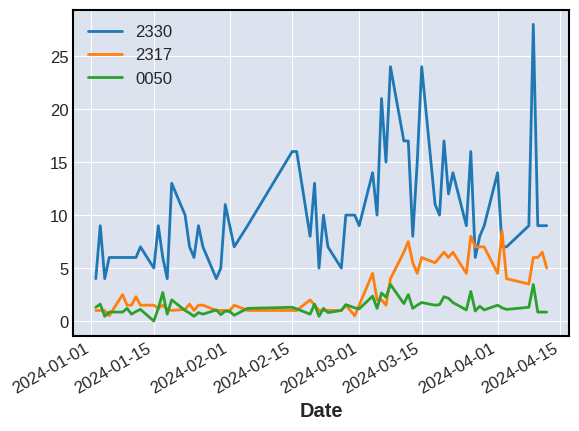

In [26]:
#每日波動
df_2330['High-Low'] = df_2330['High'] - df_2330['Low']
df_2317['High-Low'] = df_2317['High'] - df_2317['Low']
df_0050['High-Low'] = df_0050['High'] - df_0050['Low']



fig = plt.figure()
df_2330['High-Low'].plot(label="2330")
df_2317['High-Low'].plot(label="2317")
df_0050['High-Low'].plot(label="0050")

plt.legend()

In [ ]:
df_0050

###  06-1-3.比較台積電(2330)和鴻海(2317)的收益率關係，使用閃點圖

In [28]:
import yfinance as yf

start = datetime.datetime(2020, 1, 1)
campany=['2330.TW','2317.TW']
df_stock = yf.download(campany, start=start)
df_stock

[*********************100%%**********************]  2 of 2 completed


Price        Adj Close                   Close                High          \
Ticker         2317.TW     2330.TW     2317.TW 2330.TW     2317.TW 2330.TW   
Date                                                                         
2020-01-02   75.553650  308.986359   90.800003   339.0   91.500000   339.0   
2020-01-03   76.219315  309.442078   91.599998   339.5   92.199997   345.0   
2020-01-06   75.304016  302.606049   90.500000   332.0   91.099998   334.5   
2020-01-07   74.139091  300.327454   89.099998   329.5   91.000000   333.0   
2020-01-08   71.975670  300.327454   86.500000   329.5   88.099998   333.0   
...                ...         ...         ...     ...         ...     ...   
2024-04-08  158.000000  783.000000  158.000000   783.0  160.000000   792.0   
2024-04-09  158.000000  819.000000  158.000000   819.0  161.500000   820.0   
2024-04-10  154.500000  815.000000  154.500000   815.0  160.000000   819.0   
2024-04-11  150.000000  820.000000  150.000000   820.0  153.500000   820.0   
2024-04-12  150.500000  818.000000  150.500000   818.0  153.500000   826.0   

Price              Low                Open             Volume            
Ticker         2317.TW 2330.TW     2317.TW 2330.TW    2317.TW   2330.TW  
Date                                                                     
2020-01-02   90.300003   332.5   91.000000   332.5   20758722  31754120  
2020-01-03   90.800003   335.5   91.400002   344.0   37936877  41811268  
2020-01-06   90.099998   332.0   91.099998   333.0   26352522  45343057  
2020-01-07   88.300003   326.5   90.500000   332.5   42728140  50879181  
2020-01-08   86.500000   325.0   87.900002   325.0   56101121  37567748  
...                ...     ...         ...     ...        ...       ...  
2024-04-08  156.500000   783.0  159.000000   789.0  108228836  32202226  
2024-04-09  155.500000   792.0  158.500000   795.0  101725664  56857731  
2024-04-10  154.000000   810.0  159.000000   815.0   97698334  27480849  
2024-04-11  147.000000   811.0  153.000000   811.0  171910054  25200651  
2024-04-12  148.500000   817.0  151.000000   823.0  117153973  31508936  

[1037 rows x 12 columns]

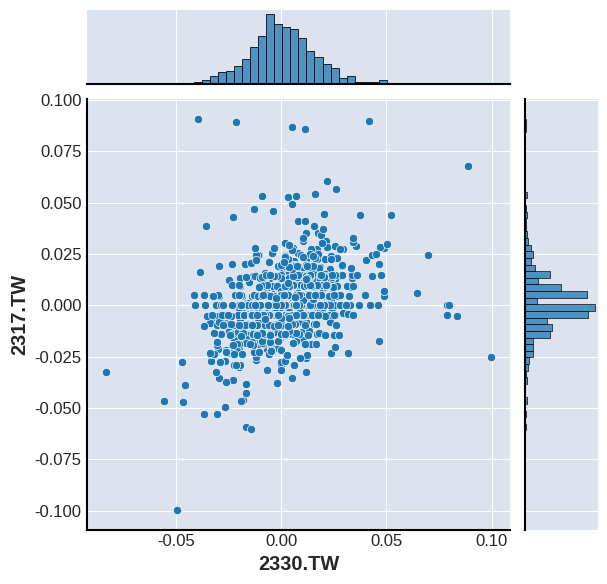

In [31]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


# 計算每個股票的百分比變化
adjClose_pct = df_stock['Adj Close'].pct_change()

# 確保 matplotlib 正確處理負號
plt.rcParams['axes.unicode_minus'] = False

# 使用 Seaborn 的 jointplot 繪製散點圖
sns.jointplot(x='2330.TW', y='2317.TW', data=adjClose_pct, kind="scatter")
plt.show()


其中x軸是第一個參數，y軸是第二個參數，這張圖表傳達的訊息

- 當x和y的座標都小於0，代表那天1和2都是跌，大於0則漲
- 當x和y的值越相近時，則閃點圖會越趨向一直線。代表兩個股票越正相關

###  06-1-4.比較台積電(2330)和鴻海(2317)的收益率關係，使用線性回歸


<Axes: xlabel='2330.TW', ylabel='2317.TW'>

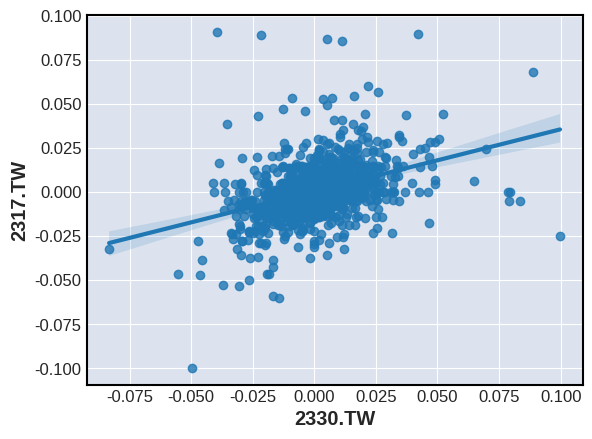

In [33]:
sns.regplot(x='2330.TW', y='2317.TW', data=adjClose_pct)

###  06-1-5.比較多家收益率關係

In [34]:
import yfinance as yf

start = datetime.datetime(2020, 1, 1)
campany=['2330.TW', '0050.TW', '2317.TW', '3008.TW']
df_stock = yf.download(campany, start=start)

[*********************100%%**********************]  4 of 4 completed


In [35]:
adjClose = df_stock['Adj Close']
plt.rcParams['axes.unicode_minus']=False
adjClose_pct = adjClose.pct_change()

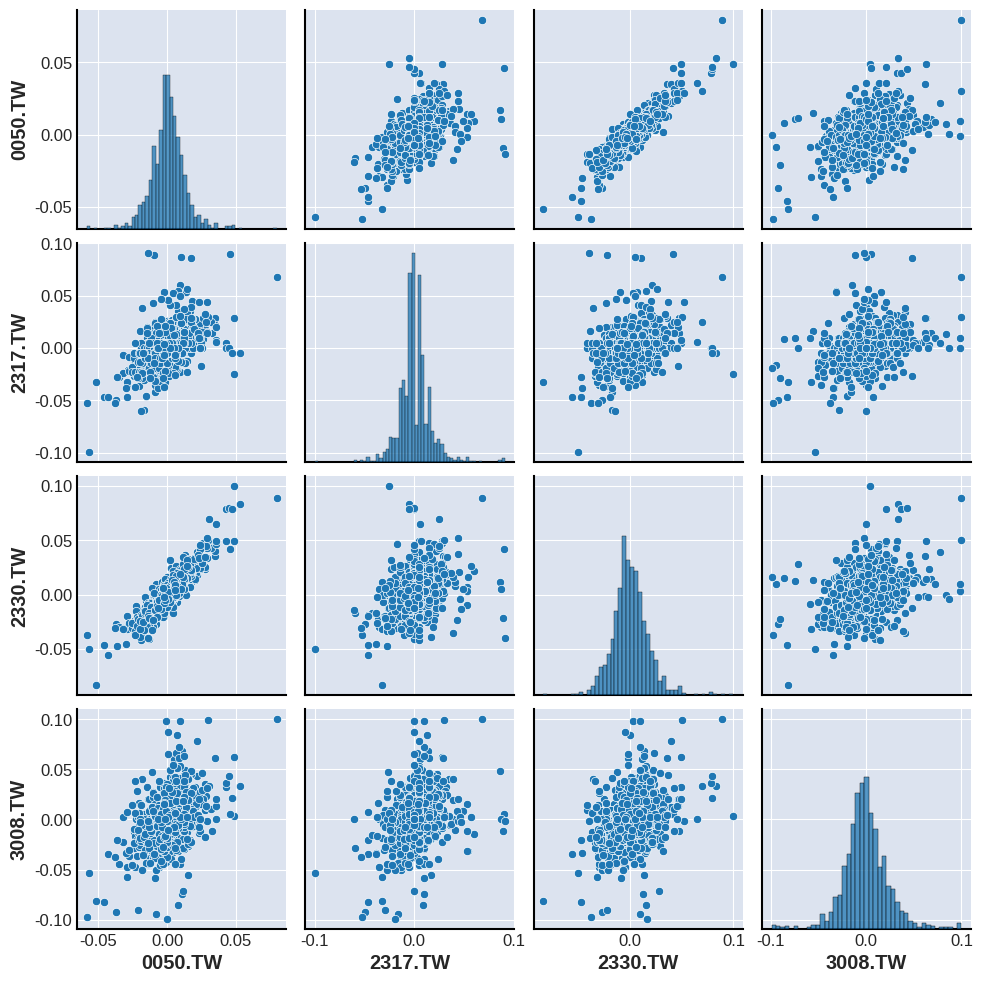

In [36]:
sns.pairplot(adjClose_pct.dropna())

## 06-2.用 Python twstock 抓台灣股價

In [ ]:
!pip install twstock

In [ ]:
import twstock
twstock.codes

In [48]:
twstock.codes['2330']

StockCodeInfo(type='股票', code='2330', name='台積電', ISIN='TW0002330008', start='1994/09/05', market='上市', group='半導體業', CFI='ESVUFR')

###  twstock.Stock()
- 抓取的股票的歷史資料

In [49]:
# 抓取歷史資料
stock_0050 = twstock.Stock('0050')

In [50]:
stock_0050.close[-5:] # 近5交易日之收盤價

[159.45, 163.25, 163.0, 162.5, 162.1]

### twstock.fetch()
- 如果要抓取超過31天的資料可以使用fetch()

In [51]:
stock_0050 = stock_0050.fetch(2020,11)      # 獲取 2020 年 11 月之股票資料

In [52]:
stock_0050

[Data(date=datetime.datetime(2020, 11, 2, 0, 0), capacity=10228786, turnover=1050887316, open=103.15, high=103.45, low=102.3, close=103.4, change=0.4, transaction=8143),
 Data(date=datetime.datetime(2020, 11, 3, 0, 0), capacity=4444060, turnover=464333020, open=104.2, high=104.85, low=104.05, close=104.6, change=1.2, transaction=4393),
 Data(date=datetime.datetime(2020, 11, 4, 0, 0), capacity=5081769, turnover=536537006, open=105.0, high=106.2, low=104.7, close=106.15, change=1.55, transaction=4542),
 Data(date=datetime.datetime(2020, 11, 5, 0, 0), capacity=4331427, turnover=459148329, open=106.2, high=106.4, low=105.55, close=106.05, change=-0.1, transaction=3321),
 Data(date=datetime.datetime(2020, 11, 6, 0, 0), capacity=6315479, turnover=674047631, open=106.35, high=107.05, low=106.3, close=106.7, change=0.65, transaction=7927),
 Data(date=datetime.datetime(2020, 11, 9, 0, 0), capacity=11429760, turnover=1234448730, open=107.75, high=108.4, low=107.25, close=108.1, change=1.4, trans

當然還可以使用取得從過去到現在的股價，下面示範從2018年01月到現在的資料，並且用開盤價和收盤價畫成圖表

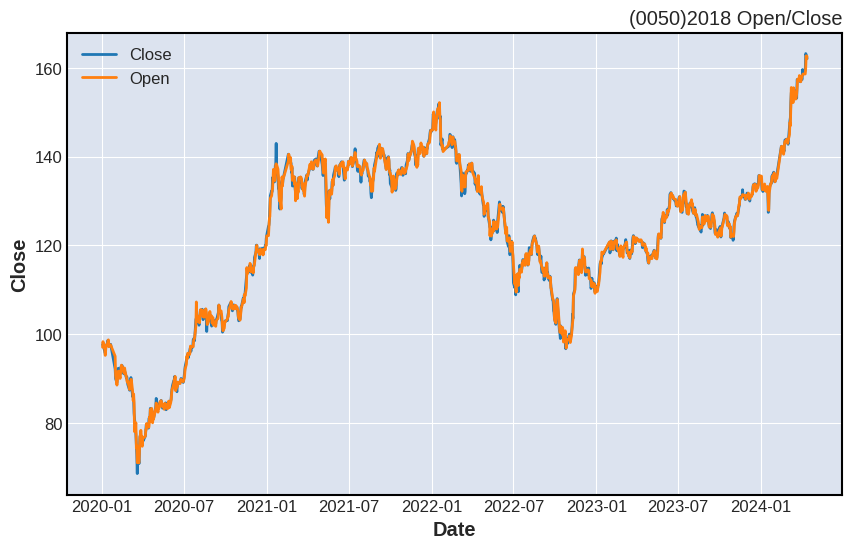

In [54]:
import matplotlib.pyplot as plt
import pandas as pd


stock_0050 = twstock.Stock('0050').fetch_from(2020,1)     # 獲取 2018 年 01 月至今日之股票資料
stock_0050_pd = pd.DataFrame(stock_0050)
stock_0050_pd = stock_0050_pd.set_index('date')


fig = plt.figure(figsize=(10, 6))
plt.plot(stock_0050_pd.close, '-' , label="Close")
plt.plot(stock_0050_pd.open, '-' , label="Open")
plt.title('(0050)2018 Open/Close',loc='right')
# loc->title的位置
plt.xlabel('Date')
plt.ylabel('Close')
plt.grid(True, axis='y')
plt.legend()
fig.savefig('day20_01.png')

### realtime()
- 這個套件不只可以抓取歷史資料也可以抓取即時資料。
- 只會抓出一筆

In [55]:
stock_0050_real = twstock.realtime.get('0050')
stock_0050_real

{'timestamp': 1712903400.0,
 'info': {'code': '0050',
  'channel': '0050.tw',
  'name': '元大台灣50',
  'fullname': '元大台灣卓越50證券投資信託基金',
  'time': '2024-04-12 06:30:00'},
 'realtime': {'latest_trade_price': '162.1000',
  'trade_volume': '70',
  'accumulate_trade_volume': '5816',
  'best_bid_price': ['162.0500',
   '162.0000',
   '161.9500',
   '161.9000',
   '161.8500'],
  'best_bid_volume': ['72', '424', '43', '32', '9'],
  'best_ask_price': ['162.1000',
   '162.1500',
   '162.2000',
   '162.2500',
   '162.3000'],
  'best_ask_volume': ['13', '1', '3', '1', '5'],
  'open': '162.6000',
  'high': '162.8000',
  'low': '161.9500'},
 'success': True}

In [56]:
# 抓取多個股票的方式
twstock.realtime.get(['2330', '2337', '2409'])

{'2330': {'timestamp': 1712903400.0,
  'info': {'code': '2330',
   'channel': '2330.tw',
   'name': '台積電',
   'fullname': '台灣積體電路製造股份有限公司',
   'time': '2024-04-12 06:30:00'},
  'realtime': {'latest_trade_price': '818.0000',
   'trade_volume': '5279',
   'accumulate_trade_volume': '31351',
   'best_bid_price': ['818.0000',
    '817.0000',
    '816.0000',
    '815.0000',
    '814.0000'],
   'best_bid_volume': ['466', '309', '327', '1142', '685'],
   'best_ask_price': ['819.0000',
    '820.0000',
    '821.0000',
    '822.0000',
    '823.0000'],
   'best_ask_volume': ['67', '272', '141', '172', '119'],
   'open': '823.0000',
   'high': '826.0000',
   'low': '817.0000'},
  'success': True},
 '2337': {'timestamp': 1712903400.0,
  'info': {'code': '2337',
   'channel': '2337.tw',
   'name': '旺宏',
   'fullname': '旺宏電子股份有限公司',
   'time': '2024-04-12 06:30:00'},
  'realtime': {'latest_trade_price': '26.9000',
   'trade_volume': '721',
   'accumulate_trade_volume': '8468',
   'best_bid_price': ['

## 06-3.繪製K線圖

- K線圖：根據股價一天走勢的 4 個價位：開盤價、收盤價、最高價、最低價繪製而成。開盤價與收盤價，會構成 K 線的實體（Body），最高價、最低價分別成為上影線（Shadow）及下影線。如果收盤價高於開盤價，Body 為紅色；收盤價低於開盤價，Body 為黑色或是綠色。




In [57]:
#安裝相關套件
!pip install yfinance
!pip install mpl_finance

In [58]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'   #預設為PNG，放大會糊掉，使用此指令則改為向量圖svg，在瀏覽器放大檢視一樣清晰

[*********************100%%**********************]  1 of 1 completed
<ipython-input-59-787ca826665e>:32: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  top = plt.subplot2grid((12, 9), (0, 0), rowspan=9, colspan=9)


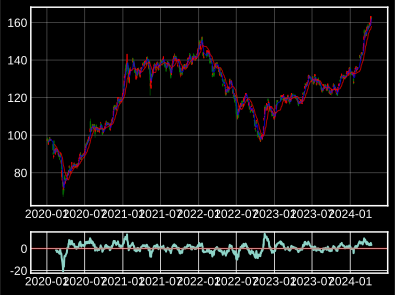

In [59]:
# Python 交易策略應用「KD」作為交易策略程式範例
import yfinance as yf
from mpl_finance import candlestick_ohlc
from matplotlib import pyplot as plt
from matplotlib import style

import matplotlib.dates as mdates
import datetime as dt
import pandas as pd
import numpy as np
import time

style.use('dark_background')

# yf.pdr_override()

fig = plt.figure()
ax1 = fig.add_subplot(111)
stock = "0050"
Analysis = 'stock0050TW.csv'
start = dt.datetime(2020, 1, 1)

df = yf.download(str(stock)+'.TW', start)
df.to_csv(Analysis)

time.sleep(2)

data = pd.read_csv(Analysis, parse_dates=True, index_col='Date')
data.head()


top = plt.subplot2grid((12, 9), (0, 0), rowspan=9, colspan=9)
bottom = plt.subplot2grid((12, 9), (10, 0), rowspan=2, colspan=9, sharex=top)


def bias(ma):
    data['MA25'] = data['Close'].rolling(window=ma).mean()
    data['BIAS'] = (data['Close'] - data['MA25']) / data['MA25'] * 100
    return data['BIAS']

bias = bias(25)

moving_avg = data["Close"].rolling(5).mean()
moving_avg20 = data["Close"].rolling(20).mean()

data = data.reset_index()
data['Date'] = data['Date'].apply(lambda d: mdates.date2num(d.to_pydatetime()))
candlestick = [tuple(x) for x in data[['Date', 'Open', 'High', 'Low', 'Close']].values]
candlestick_ohlc(top, candlestick, width=0.7, colorup='r', colordown='green', alpha=0.8)

top.plot(moving_avg, color='b', linewidth=1, alpha=0.7, label='MA5')
top.plot(moving_avg20, color='r', linewidth=1, alpha=0.7, label='MA20')
top.grid(which='both', alpha=0.3)

bottom.plot(bias)
bottom.axhline(0, color='r', alpha=0.3)

plt.savefig('stock_with_KD.pdf', bbox_inches='tight')  #輸出pdf
plt.show()

### 動手做
- 現在請您自行嘗試執行範例程式碼
- 您可以置換股票代碼，畫出線圖
- 作為.py檔案繪製

### reference

- [python 入門到分析股市](https://ithelp.ithome.com.tw/users/20111390/ironman/1791)